In [68]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt 

In [104]:
def MSE(orginalImage ,gaussainImage):
    mse = (orginalImage - gaussainImage) ** 2
    mse = np.sum(mse)
    MN = orginalImage.shape[0] * orginalImage.shape[1]
    return mse / MN

In [69]:
def PSNR (orginalImage ,gaussainImage):
    return 10 * math.log10((255 * 255)/MSE(orginalImage,gaussainImage))

In [38]:
def noisy(image ,sigma): 
    row,col= image.shape
    gauss = np.random.normal(0,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    return image + gauss

In [223]:
def applyNoisy(img):
    noisyList = list()
    for i in range(10,91,30):
        plt.figure(figsize=(20,10))
        plt.subplot(131)
        plt.title("Lena with " + str(i) + " sigma")
        plt.axis('off')
        image = noisy(img ,i)
        plt.imshow(image ,cmap="gray")
        noisyList.append(image)
        plt.subplot(132)
        plt.title("Lena with " + str(i + 10) + " sigma")
        plt.axis('off')
        image = noisy(img ,i + 10)
        plt.imshow(image ,cmap="gray")
        noisyList.append(image)
        plt.subplot(133)
        plt.title("Lena with " + str(i + 20) + " sigma")
        plt.axis('off')
        image = noisy(img ,i + 20)
        plt.imshow(image ,cmap="gray")
        noisyList.append(image)
    return noisyList

In [208]:
def bestMSE(orginalImage ,noisyImages):
    images = list()
    MSES = list()
    PSNRS = list()
    minMses = list()
    maxPSNR= list()
    gaussianImages = list()
    bestSigma = list()
    np.set_printoptions(precision=4)
    sigma = np.linspace(0 ,3 ,3000)
    for img in noisyImages:
        for i in sigma:
            
            kernel = int(2 * (math.floor((3 * i))) + 1)
            myImage = cv2.GaussianBlur(img, (kernel,kernel), i)
            
            MSES.append(MSE(orginalImage ,myImage))
            PSNRS.append(PSNR(orginalImage ,myImage))
            images.append(myImage)
            
        
        minMses.append(min(MSES))
        maxPSNR.append(max(PSNRS))
        bestSigma.append(sigma[MSES.index(min(MSES))])
        gaussianImages.append(images[MSES.index(min(MSES))])
        MSES = list()
        PSNRS = list()
        
        
    return  gaussianImages,minMses ,maxPSNR ,bestSigma

In [219]:
def displayImages(images ,sigmaes ,minMses, maxPSNRS):
    counter = 0
    for counter in range(0,len(images),3):
        
        plt.figure(figsize=(20,10))
        plt.subplot(131)
        plt.title("simga : " + str(round(sigmaes[counter] ,2)) + ", MSE : " + str(round(minMses[counter] ,2)) + ", PSNR : " + str(round(maxPSNRS[counter],2)))
        plt.axis('off')
        plt.imshow(images[counter], cmap="gray")
        plt.subplot(132)
        plt.title("simga : " + str(round(sigmaes[counter + 1], 2)) + ", MSE : " + str(round(minMses[counter + 1], 2)) + ", PSNR : " + str(round(maxPSNRS[counter + 1] , 2)))
        plt.axis('off')
        plt.imshow(images[counter + 1], cmap="gray")
        plt.subplot(133)
        plt.title("simga : " + str(round(sigmaes[counter + 2] ,2)) + ", MSE : " + str(round(minMses[counter + 2] ,2)) + " PSNR : " + str(round(maxPSNRS[counter + 2] ,2)))
        plt.axis('off')
        plt.imshow(images[counter + 2], cmap="gray")

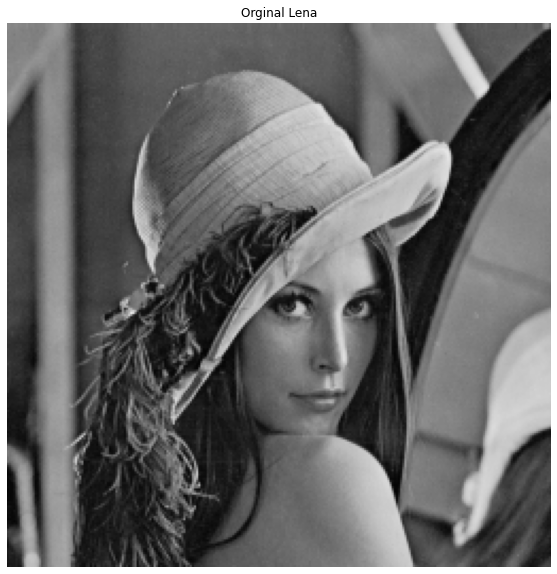

In [217]:
lena = cv2.imread("lena.tif", 0)
plt.figure(figsize=(20,10))
plt.title("Orginal Lena")
plt.axis('off')
plt.imshow(cv2.cvtColor(lena,cv2.COLOR_BGR2RGB))

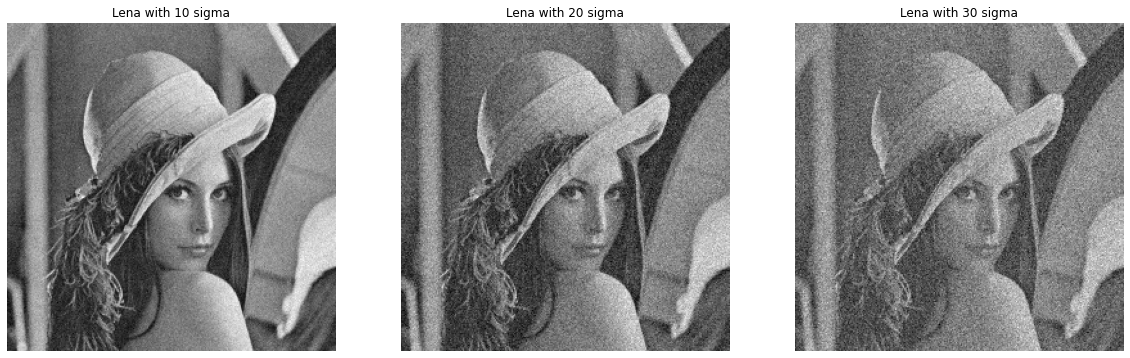

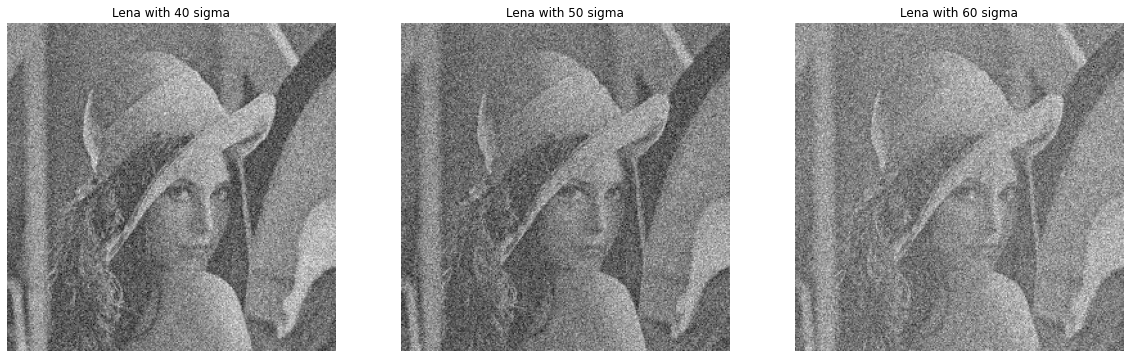

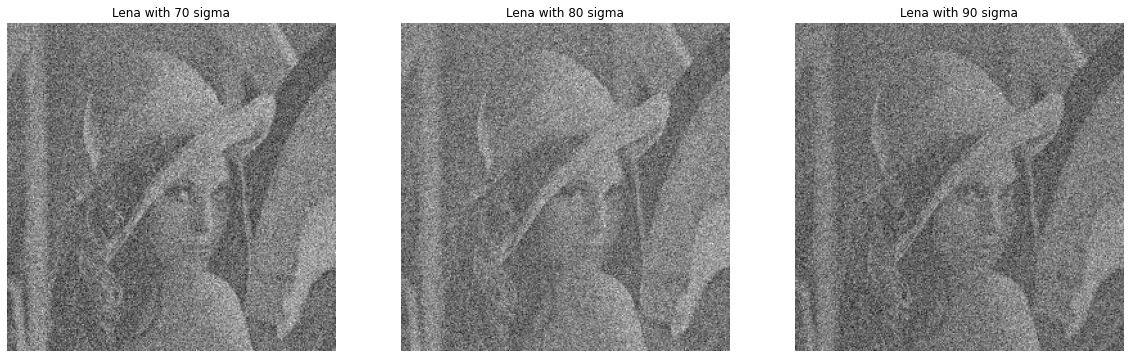

In [224]:
noisyImages =  applyNoisy(lena)

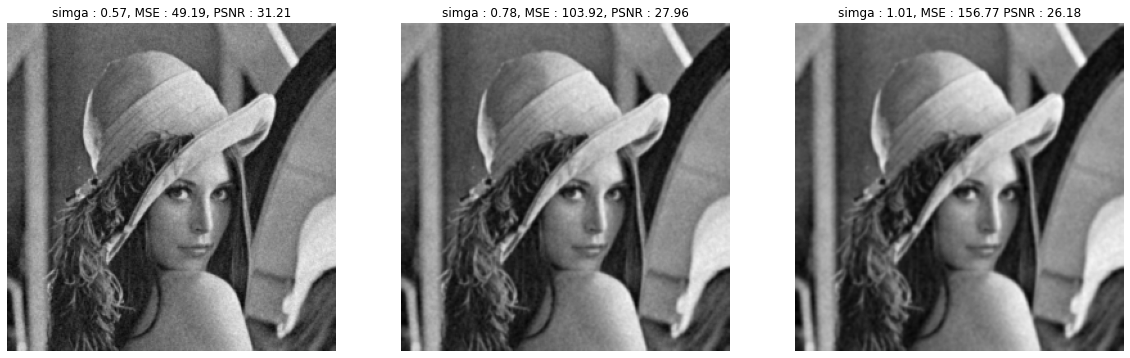

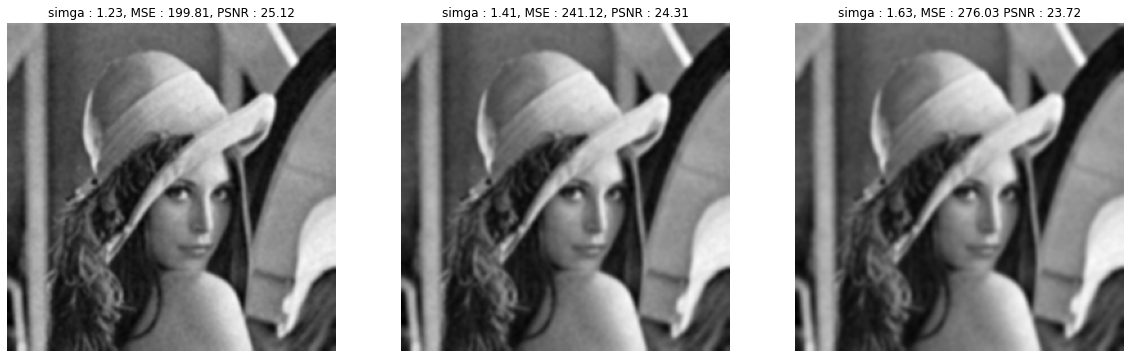

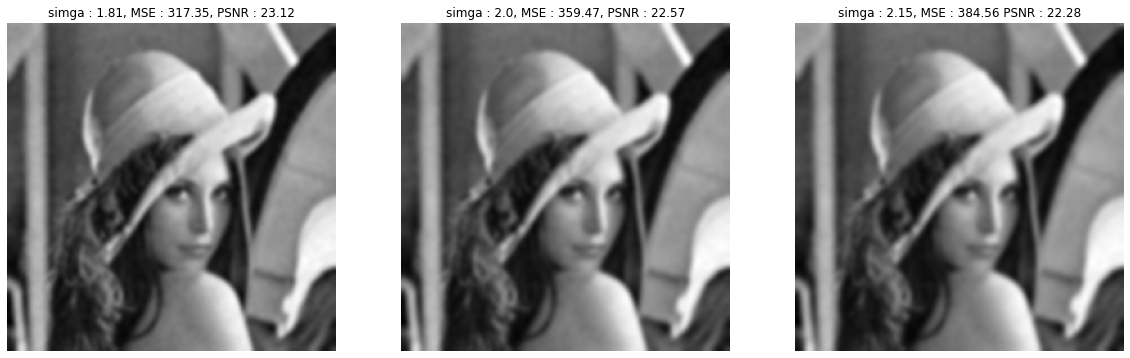

In [220]:
images ,minMses ,maxPSNRS , sigmaes = bestMSE(lena,noisyImages)
displayImages(images ,sigmaes ,minMses, maxPSNRS)

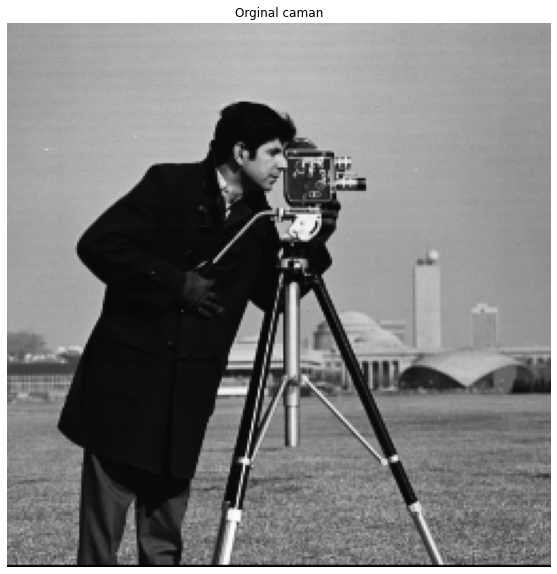

In [231]:
caman = cv2.imread("caman.tif", 0)
plt.figure(figsize=(20,10))
plt.title("Orginal caman")
plt.axis('off')
plt.imshow(cv2.cvtColor(caman,cv2.COLOR_BGR2RGB))

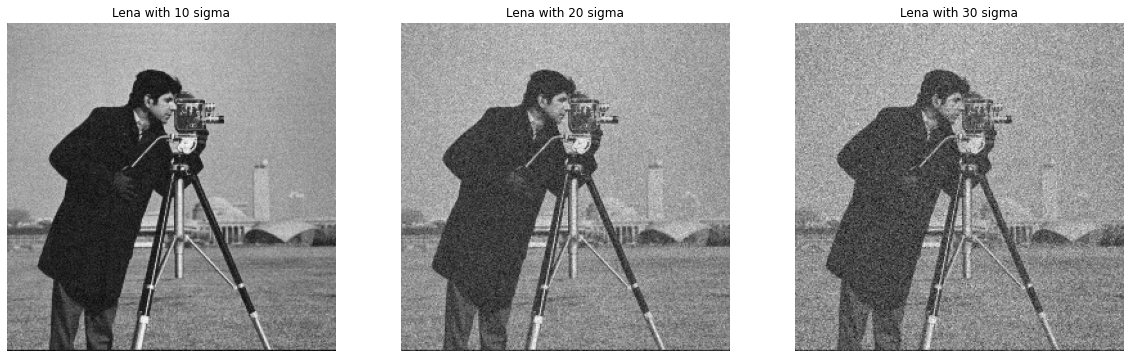

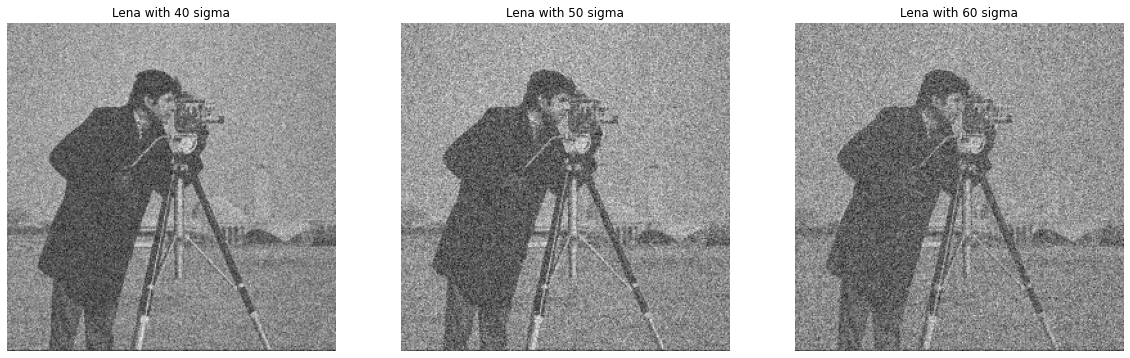

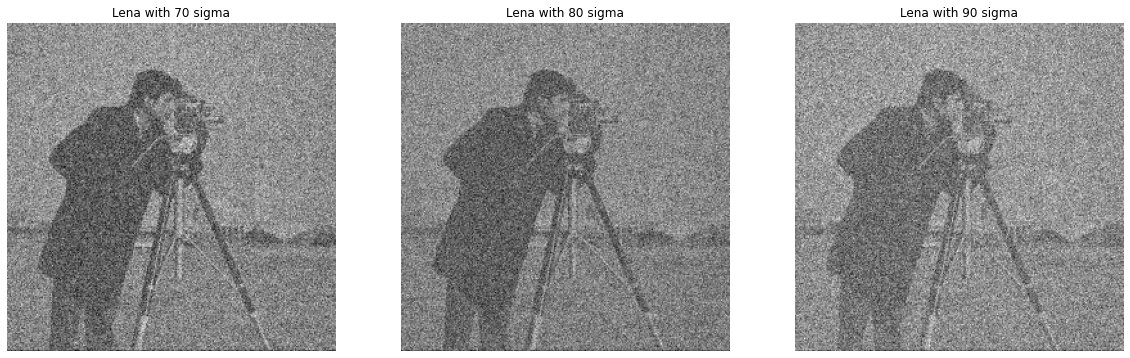

In [225]:
noisyImages =  applyNoisy(caman)

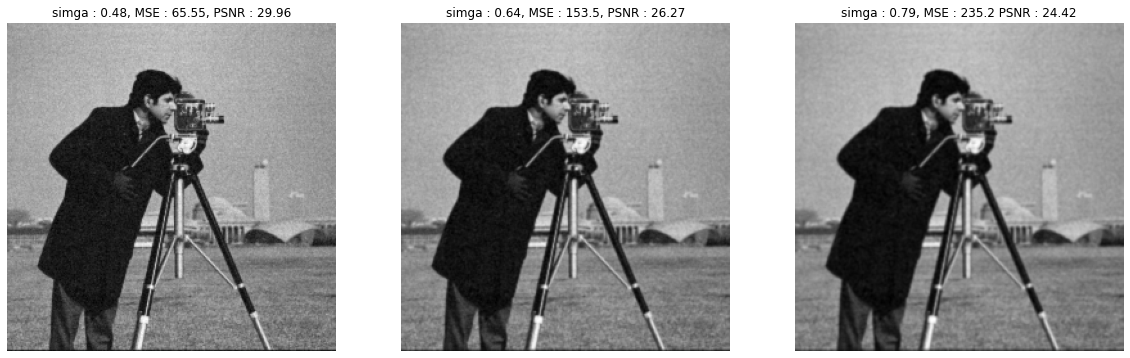

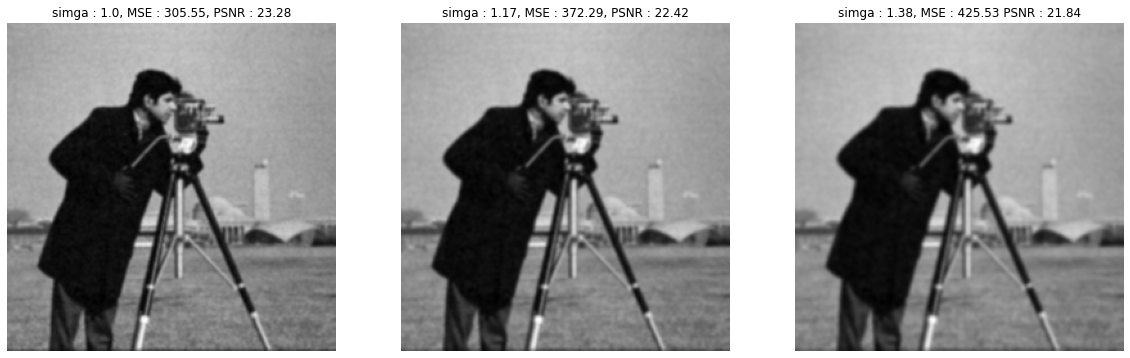

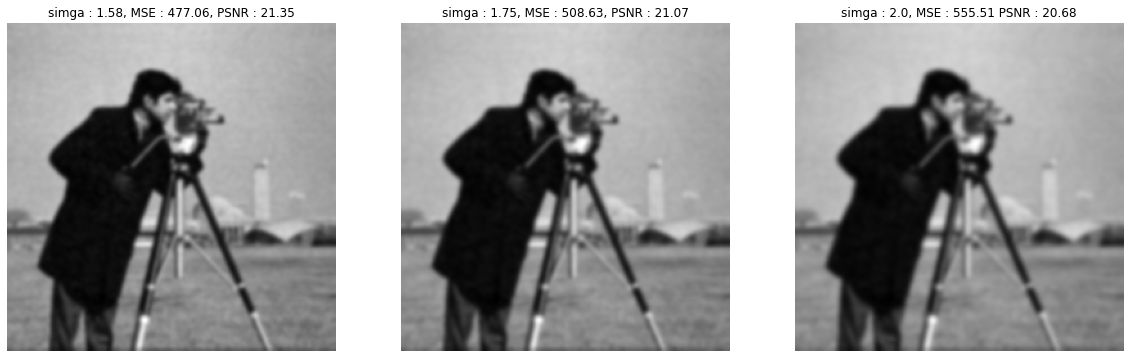

In [226]:
images ,minMses ,maxPSNRS , sigmaes = bestMSE(caman,noisyImages)
displayImages(images ,sigmaes ,minMses, maxPSNRS)

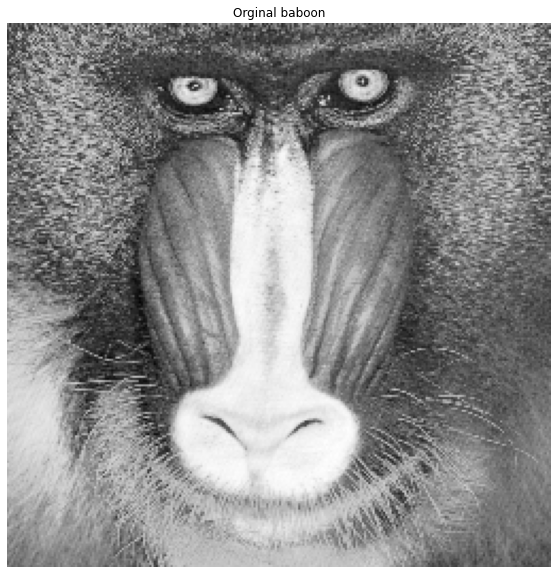

In [228]:
baboon = cv2.imread("baboon.bmp", 0)
plt.figure(figsize=(20,10))
plt.title("Orginal baboon")
plt.axis('off')
plt.imshow(cv2.cvtColor(baboon,cv2.COLOR_BGR2RGB))

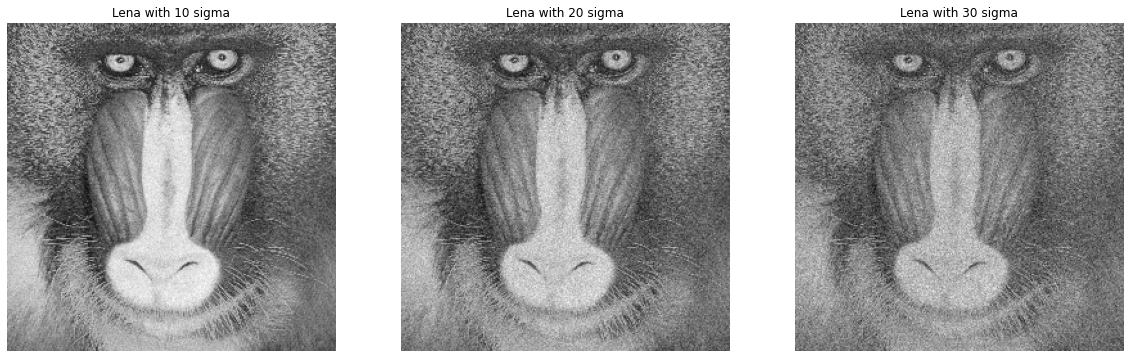

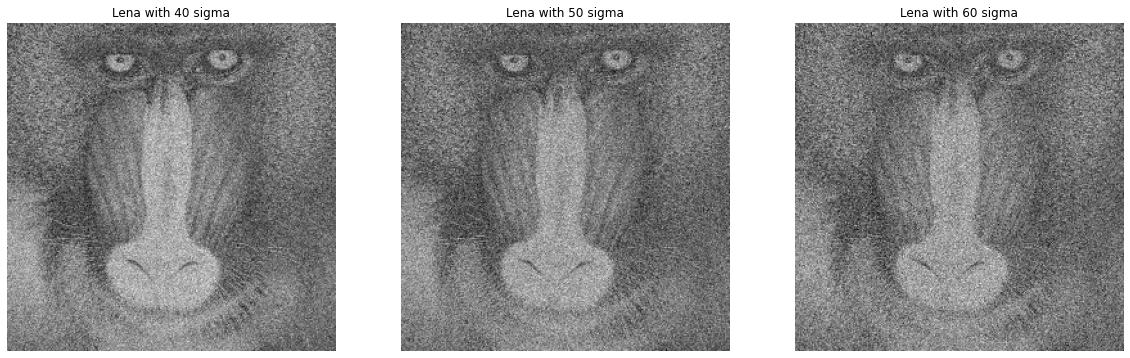

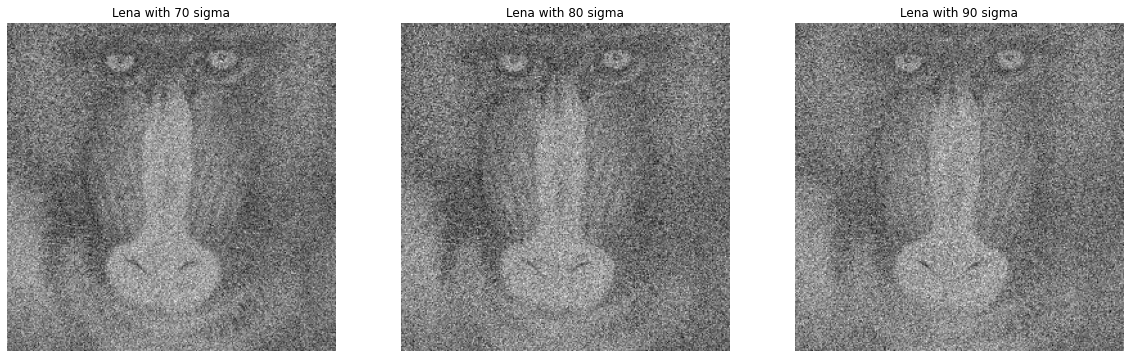

In [229]:
noisyImages =  applyNoisy(baboon)

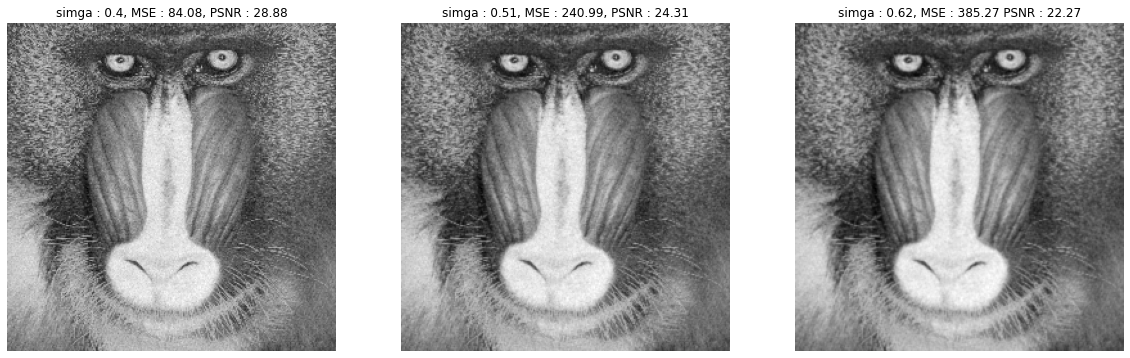

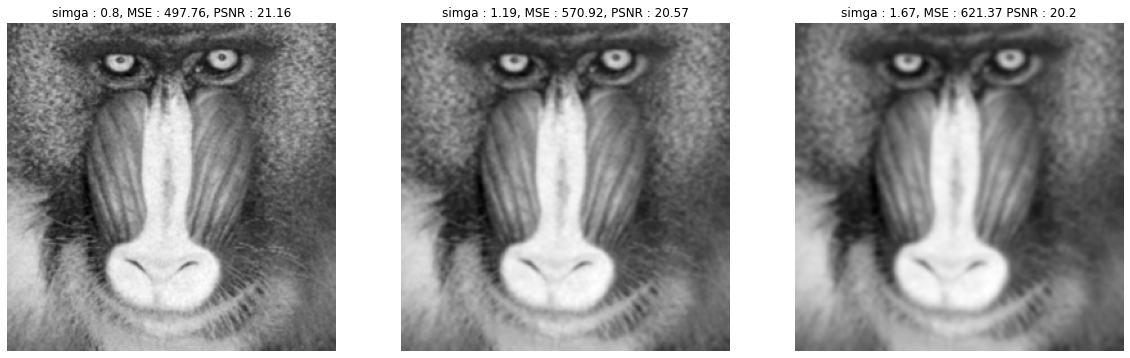

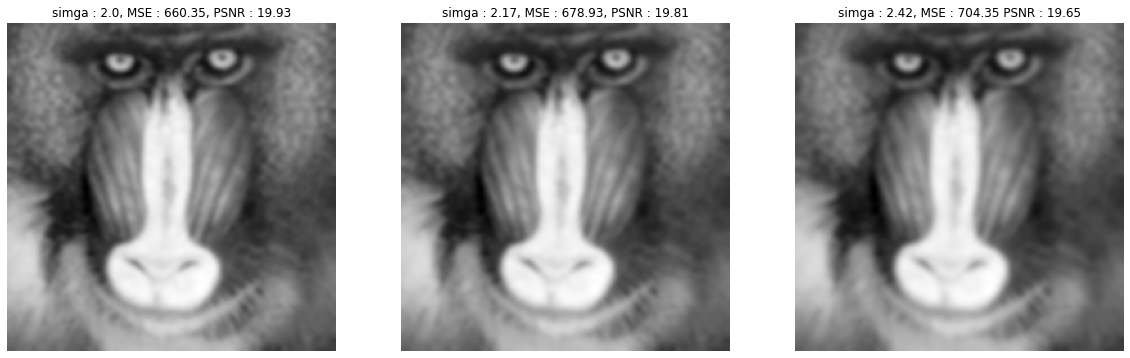

In [230]:
images ,minMses ,maxPSNRS , sigmaes = bestMSE(baboon,noisyImages)
displayImages(images ,sigmaes ,minMses, maxPSNRS)